1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [59]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

###Generating the dataset
N = 1000
x = np.random.normal(loc = 0, scale = 1, size = N)
y = x + np.random.normal(loc = 0, scale = 3, size = N)
z = 2*x + y
v =np.array([x,y,z])

###Eingenvectors and eigenvalues with covariance matrix eigendecomposition
cov = np.cov(v)
l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigenvalues using covariance matrix decomposition: \n\n", l, "\n")
print("Eigenvectors using covariance matrix decomposition: \n\n", V.T, "\n")

###Eigenvectors and eigenvalues with SVD
U, S, Vt = la.svd(cov)

l_svd = S**2/(N-1)
V_svd = U.T

print("Eigenvalues using SVD: \n\n", l_svd, "\n")
print("Eigenvectors using SVD: \n\n", V_svd, "\n")

# print("shapes: U =", U.shape, "D:", S.shape, "V^T:", Vt.shape, '\n')
# print("Spectrum:\n", S, '\n')
# print("U:\n", U, '\n')
# print("V^T:\n", Vt, '\n')

print("The values of eigencalues and eigenvectors are not precisely the same, but can be considered to be equal within a small error range.")

###Dataset variability
Lambda = np.diag(l)
tot_var = 0
perc = np.empty((3,1))
for i in range(len(v)):
    perc[i] = (Lambda[i,i]/Lambda.trace())*100
    print("The component x",i+1,"explain the ",perc[i], "% of the total variability")
    if perc[i] > 1:
        tot_var += perc[i]

print("To reach 99% of explained variability, it's useful to consider only two components.")
print("Considering only  the two main components (x1 and x3) the total retained variability is ", tot_var)
#print("This is due to the fact that x1 is the only one independent, while the others are dependent on x1.")

Eigenvalues using covariance matrix decomposition: 

 [2.74736310e+01 1.48633201e-15 1.95195387e+00] 

Eigenvectors using covariance matrix decomposition: 

 [[-0.11329782 -0.58006024 -0.80665589]
 [-0.81649658 -0.40824829  0.40824829]
 [ 0.56612449 -0.70488542  0.42736356]] 

Eigenvalues using SVD: 

 [7.55555955e-01 3.81393783e-03 3.49908084e-34] 

Eigenvectors using SVD: 

 [[-0.11329782 -0.58006024 -0.80665589]
 [ 0.56612449 -0.70488542  0.42736356]
 [-0.81649658 -0.40824829  0.40824829]] 

The values of eigencalues and eigenvectors are not precisely the same, but can be considered to be equal within a small error range.
The component x 1 explain the  [93.36647385] % of the total variability
The component x 2 explain the  [5.05115536e-15] % of the total variability
The component x 3 explain the  [6.63352615] % of the total variability
To reach 99% of explained variability, it's useful to consider only two components.
Considering only  the two main components (x1 and x3) the total r

In [61]:
###Redefine data using PCA base

#Recalculating covariance matrix, eigenvectors and eigenvalues for data combinations

cov12 = np.cov([v[0],v[1]])
l12, V12 = la.eig(cov12)
l12 = np.real_if_close(l12)
cov13 = np.cov([v[0],v[2]])
l13, V13 = la.eig(cov13)
l13 = np.real_if_close(l13)
cov23 = np.cov([v[1],v[2]])
l23, V23 = la.eig(cov23)
l23 = np.real_if_close(l23)

#Setting rotated data

Xp12 = np.dot(V12.T, [v[0],v[1]])
Xp13 = np.dot(V13.T, [v[0],v[2]])
Xp23 = np.dot(V23.T, [v[1],v[2]])

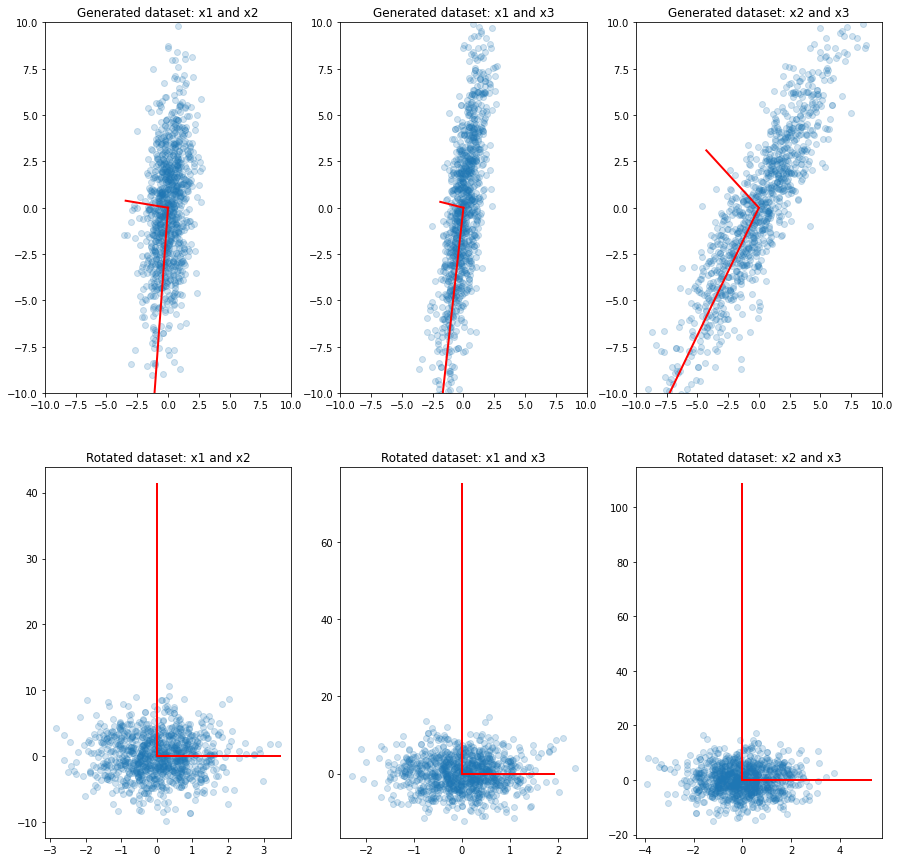

In [62]:
#Setting plot display
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize = (15,15))
ax1.scatter(v[0,:], v[1,:], alpha = 0.2)
ax1.set_title("Generated dataset: x1 and x2")
ax1.axis([-10,10,-10,10])

ax2.scatter(v[0,:], v[2,:], alpha = 0.2)
ax2.set_title("Generated dataset: x1 and x3")
ax2.axis([-10,10,-10,10])

ax3.scatter(v[1,:], v[2,:], alpha = 0.2)
ax3.set_title("Generated dataset: x2 and x3")
ax3.axis([-10,10,-10,10])

scale_factor = 4

for li, vi in zip(l12, V12.T):
    #print("Eigenvalue:", li, ",\teigenvector:", vi)
    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)

for li,vi in zip(l13,V13.T):
    ax2.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)

for li, vi in zip(l23, V23.T):
    ax3.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)

###Redefining the plots according to the rotated data

ax4.set_title("Rotated dataset: x1 and x2")
ax5.set_title("Rotated dataset: x1 and x3")
ax6.set_title("Rotated dataset: x2 and x3")

ax4.scatter(Xp12[0,:], Xp12[1,:], alpha=0.2)
#ax4.axis([-3,3,-3,3])
ax5.scatter(Xp13[0,:], Xp13[1,:], alpha=0.2)
#ax5.axis([-10,10,-10,10])
ax6.scatter(Xp23[0,:], Xp23[1,:], alpha=0.2)
#ax6.axis([-10,10,-10,10])

for li, vi in zip(l12, np.diag([1]*len(l12))):
    ax4.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    
for li, vi in zip(l13, np.diag([1]*len(l13))):
    ax5.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

for li,vi in zip(l23, np.diag([1]*len(l23))):
    ax6.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [25]:
#setting data as requested by the exercise

sigma = np.diag(np.random.uniform(0,1/20,n_var))
n_var = 10

#noise array made of 10 different components
noise = np.random.multivariate_normal([0]*n_var,sigma,N).T

v_noise = np.concatenate((v,noise))
print("New dataset shape with added noise: ",v_noise.shape)

#defining new PCA

cov_noise = np.cov(v_noise)

l_noise, V_noise = la.eig(cov_noise)
l_noise = np.real_if_close(l_noise)
print("The eigenvalues obtained with noise are: ", l_noise)
print("The eigenvectors obtained with noise are: ", V_noise)

New dataset shape with added noise:  (13, 1000)
The eigenvalues obtained with noise are:  [ 2.79177885e+01  1.98071648e+00  5.00355429e-02  4.16627102e-02
 -6.14229493e-16  2.03316430e-03  3.33694012e-03  9.69927155e-03
  1.75745484e-02  2.05179781e-02  2.38532350e-02  2.65815367e-02
  2.52167167e-02]
The eigenvectors obtained with noise are:  [[-1.16482739e-01 -5.65470783e-01  8.30443202e-04 -3.12911143e-04
  -8.16496581e-01 -4.43522528e-04 -1.12618365e-04  8.37227306e-04
  -2.92700300e-04  1.97494311e-03 -1.45666482e-03  2.80865365e-04
   1.17144758e-04]
 [-5.76081097e-01  7.08126674e-01 -1.31654401e-03  1.31133831e-03
  -4.08248290e-01  7.46875794e-04 -1.33714184e-04 -8.47839123e-04
   8.10461162e-04 -2.40235886e-03  3.02458659e-03  2.40543968e-04
  -3.67837829e-04]
 [-8.09046575e-01 -4.22814892e-01  3.44342398e-04  6.85516019e-04
   4.08248290e-01 -1.40169262e-04 -3.58950914e-04  8.26615489e-04
   2.25060562e-04  1.54752735e-03  1.11256951e-04  8.02274699e-04
  -1.33548313e-04]
 [ 

In [29]:
#Let's apply SVD to see if the dimensionality can be reduced in the new dataset

Lambda = np.diag(l_noise)
for i in range(13):
    print("Considering the component number ",i+1, "the total variability to retain is ",Lambda[i,i]/(Lambda.trace())*100)
    
print("As can be observed, the added noise components (from number 4 to 13) have a variability around 0.")
print("Has seen in the previous exercise, the third component is already negligible.")
print("For this reason, using only the first two components with a considerable variability: ",(Lambda[0,0]+Lambda[1,1])/Lambda.trace()*100)

Considering the component number  1 the total variability to retain is  92.6915670675134
Considering the component number  2 the total variability to retain is  6.576298657357245
Considering the component number  3 the total variability to retain is  0.16612608414746055
Considering the component number  4 the total variability to retain is  0.1383269271728554
Considering the component number  5 the total variability to retain is  -2.0393411282535715e-15
Considering the component number  6 the total variability to retain is  0.006750433890275628
Considering the component number  7 the total variability to retain is  0.011079180170090854
Considering the component number  8 the total variability to retain is  0.03220314817462708
Considering the component number  9 the total variability to retain is  0.05835033931022857
Considering the component number  10 the total variability to retain is  0.06812300136885438
Considering the component number  11 the total variability to retain is  0.0791

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [9]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/ --no-check-certificate
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ --no-check-certificate

In [44]:
import pandas as pd

#importing the file and setting up the dataframe
data = pd.read_csv('data/magic04.data', delimiter = ",")

#attributes got from the names file
#!type data\magic04.names
attributes = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
data.columns = attributes
df = data.copy()
Class = data["class"]
del data["class"]

#print(df)
features = np.array(data.values.tolist()).T

cov = np.cov(features)
l,V = la.eig(cov)
l = np.real_if_close(l)
print("The eigenvalues for the magic dataset are: ",l)
print("The eigenvectors for the magic dataset are: ",V)

The eigenvalues for the magic dataset are:  [6.57940709e+03 3.85406143e+03 2.01648128e+03 1.32681867e+03
 6.10218593e+02 4.33618554e+02 1.17335954e+02 8.64007193e-02
 1.07368268e-02 3.85330787e-04]
The eigenvectors for the magic dataset are:  [[ 3.27831566e-01  1.34391257e-01 -6.54919335e-02 -8.63984924e-01
  -9.45486785e-02 -1.98590747e-02  3.38166047e-01  3.99908190e-03
  -4.54855335e-04  4.57009104e-05]
 [ 1.13818908e-01  5.38781071e-02  1.90004002e-02 -3.19763260e-01
   1.97550122e-02  2.32607173e-02 -9.38308008e-01  1.33846960e-02
   6.74914234e-04 -5.73082482e-05]
 [ 3.06095229e-03 -6.59527755e-04 -1.05914677e-03 -6.93020544e-03
  -2.65186570e-03  1.33537798e-04 -1.08822564e-02 -9.27766268e-01
  -3.72227209e-01  2.26325035e-02]
 [-9.27207133e-04  2.58262608e-04  5.10330302e-04  2.60551065e-03
   1.53901245e-03 -3.47117394e-05  3.06281191e-03  3.22018741e-01
  -7.69225390e-01  5.51884502e-01]
 [-5.21959171e-04  1.52747029e-04  2.94589142e-04  1.51272408e-03
   9.19355464e-04 -2.22

In [48]:
#Same procedure applied for the exercise 2

Lambda = np.diag(l)
var = np.diagonal(Lambda)/Lambda.trace()*100
count = 0
tot_var = 0

for i in range(len(attributes)-1): #not counting the class dimension
    #print("The component ",i+1," the total variability to retain is ", var[i])
    if var[i] > 1:
        count += 1
        tot_var += var[i]

print("Considering ",count," variables instead of ",len(attributes)-1, " the total variability retained is ", tot_var)

Considering  6  variables instead of  10  the total variability retained is  99.21386283387905
